In [24]:
# JesseRuiz_nlp_project_Codeup_2019

In [25]:
from requests import get
import requests
from bs4 import BeautifulSoup
import os
import json
from pprint import pprint
import re

import itertools as it
from typing import List, Dict
import pandas as pd

import numpy as np
import unicodedata

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

random_state=123
import random

In [26]:
# Found on https://madnight.github.io/githut/#/pull_requests/2019/1
langs = ['JavaScript',
'Python',
'Java',
'Go',
'C++',
'Ruby',
'PHP',
'TypeScript',
'C#',
'C',
'Shell',
'Scala',
'Swift',
'Rust',
'Kotlin',
'Objective-C',
'Groovy',
'Elixir',
'Lua',
'DM',
'Perl',
'Dart',
'Clojure',
'PowerShell',
'CoffeeScript',
'Haskell',
'OCaml',
'R',
'Emacs Lisp',
'Vim script',
'Jsonnet',
'Erlang',
'Puppet',
'Julia',
'Smalltalk',
'MATLAB',
'WebAssembly',
'Fortran',
'F#',
'Visual Basic',
'Apex',
'ABAP',
'Vala',
'Nix',
'Crystal',
'Roff',
'Perl 6',
'FreeMarker',
'PureScript',
'Objective-C++',
'HTML',
'CSS',
'Vue']

In [27]:
langs = [element.lower() for element in langs]
langs

['javascript',
 'python',
 'java',
 'go',
 'c++',
 'ruby',
 'php',
 'typescript',
 'c#',
 'c',
 'shell',
 'scala',
 'swift',
 'rust',
 'kotlin',
 'objective-c',
 'groovy',
 'elixir',
 'lua',
 'dm',
 'perl',
 'dart',
 'clojure',
 'powershell',
 'coffeescript',
 'haskell',
 'ocaml',
 'r',
 'emacs lisp',
 'vim script',
 'jsonnet',
 'erlang',
 'puppet',
 'julia',
 'smalltalk',
 'matlab',
 'webassembly',
 'fortran',
 'f#',
 'visual basic',
 'apex',
 'abap',
 'vala',
 'nix',
 'crystal',
 'roff',
 'perl 6',
 'freemarker',
 'purescript',
 'objective-c++',
 'html',
 'css',
 'vue']

In [5]:
# Function shows a list of labels (Programming Language) of a repository. 
# The function takes a BeautifulSoup ResultSet and returns a list.
def get_labels(bs4resultset):
    labels = []
    for div in bs4resultset:
        repo_list = re.findall(r'.+', div.text.lower())
        lang = list(set(repo_list) & set(langs))
        if lang != []:
            labels.append(lang[0])
        else:
            labels.append('na')
    return labels


In [6]:
# Function shows what the user/repo_name and the label (Programming Language) is... 
# Creates a list of lists.

def repo_name_and_label(bs4resultset):
    name_label = []
    for div in bs4resultset:
        one = []
        one.append(re.findall(r'.*\s/\s.*',div.text)[0])
        lang = list(set(re.findall(r'.+', div.text.lower())) & set(langs))
        if lang != []:
            one.append(lang[0])
        else:
            one.append('na')
        name_label.append(one)
    return name_label

## Acquire

### General approach to choosing what type of data to scrape from Github: 
#### Use the url: https://github.com/search?o=desc&q=stars%3A%3E1&s=updated&type=Repositories
### This page shows the most recently updates repos on Github.

In [7]:
base_url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'

In [8]:
headers = {'User-Agent': 'student'} # codeup.com doesn't like our default user-agent
response = get(base_url)

In [9]:
print(response.text[:400])



<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https:/


In [10]:
pprint(response.text)

('\n'
 '\n'
 '<!DOCTYPE html>\n'
 '<html lang="en">\n'
 '  <head>\n'
 '    <meta charset="utf-8">\n'
 '  <link rel="dns-prefetch" href="https://github.githubassets.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n'
 '  <link rel="dns-prefetch" '
 'href="https://user-images.githubusercontent.com/">\n'
 '\n'
 '\n'
 '\n'
 '  <link crossorigin="anonymous" media="all" '
 'integrity="sha512-3+HOqCwtQal5hOJQ+mdxiq5zmGOTjF6RhjDsPLxbKDYgGlLFeCwzoIanb7j5IiCuXKUqyC2q8FdkC4nmx2P2rA==" '
 'rel="stylesheet" '
 'href="https://github.githubassets.com/assets/frameworks-a2fba223d5af91496cac70d4ec3624df.css" '
 '/>\n'
 '  <link crossorigin="anonymous" media="

 'href="/topics/engenharia-de-software" title="Topic: engenharia-de-software" '
 'data-ga-click="Topic, search results" data-octo-click="topic_click" '
 'data-octo-dimensions="topic:engenharia-de-software,repository_id:172908151,repository_nwo:aserg-ufmg/CursoEngenhariaSoftware,repository_public:true,repository_is_fork:false">\n'
 '        engenharia-de-software\n'
 '</a>\n'
 '\n'
 '      </div>\n'
 '\n'
 '    <div class="d-flex flex-wrap">\n'
 '\n'
 '        <p class="f6 text-gray mr-3 mb-0 mt-2">\n'
 '          Updated <relative-time datetime="2019-05-13T17:18:05Z">May 13, '
 '2019</relative-time>\n'
 '        </p>\n'
 '\n'
 '    </div>\n'
 '  </div>\n'
 '\n'
 '  <div class="flex-shrink-0 col-6 col-md-4 pt-2 pr-md-3 d-flex">\n'
 '    <div class="text-gray flex-auto min-width-0">\n'
 '    </div>\n'
 '\n'
 '      <div class="pl-2 pl-md-0 text-right flex-auto min-width-0">\n'
 '        <a class="muted-link" '
 'href="/aserg-ufmg/CursoEngenhariaSoftware/stargazers">\n'
 '          <svg a

### Create a BeautifulSoup object

In [11]:
soup = BeautifulSoup(response.content, 'html.parser')


In [12]:
soup


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-a2fba223d5af91496cac70d4ec3624df.css" integrity="sha512-3+HOqCwtQal5hOJQ+mdxiq5zmGOTjF6RhjDsPLxbKDYgGlLFeCwzoIanb7j5IiCuXKUqyC2q8FdkC4nmx2P2rA==" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-4540bebef0c6bac62c2b8b073beec16b.css" integrity="sha512-4ohd09bNnMlKWClfY22ZwyWNN3GJm

### This looks for the repo class, which is structured differently than the TRENDING page which we used before...
### Each page contains 10 repos... 

In [13]:
# We search for all the repositories that have the following class. We should get back 25 objects.
repo2 = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
print(type(repo2))

<class 'bs4.element.ResultSet'>


In [14]:
print(len(repo2))

10


In [15]:
# Show what the repo looks like

for div in repo2:
    print(div.text)




aserg-ufmg/CursoEngenhariaSoftware


        Curso de Engenharia de Software (Bacharelado em Ciência da Computação, DCC/UFMG)
      


        curso


        engenharia-de-software




          Updated May 13, 2019









          9
        






sobotka/blender


        Mirror of the official Blender Git repository. Updated every hour.
      


        blender


        b3d


        rendering-3d-graphics


        3d-printing


        ray-tracing


        3d


        compositing


        3d-graphics


        path-tracing




          Updated May 13, 2019








C






          139
        






snowcoders/sortier


        An opinionated code sorter
      


        sorter


        javascript


        html


        flow


        json


        typescript


        printer


        ast


        sort




          MIT license
        

          Updated May 13, 2019








TypeScript






          11
        






bitfield/script


        Making it easy t

### Now that we have an entirely different HTML text structure, we have to write new regex to capture the relevant information.

### This function crawls across multiple pages to scrape these pages. Aiming for 150 repos, which is 15 pages.

In [16]:
repo2

[<li class="repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source">
 <div class="col-12 col-md-8 pr-md-3">
 <h3>
 <a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"stars:&gt;1","result_position":1,"click_id":172908151,"result":{"id":172908151,"global_relay_id":"MDEwOlJlcG9zaXRvcnkxNzI5MDgxNTE=","model_name":"Repository","url":"https://github.com/aserg-ufmg/CursoEngenhariaSoftware"},"client_id":null,"originating_request_id":"C555:582F:223AD79:38F4365:5CD9A6D0","originating_url":"https://github.com/search?o=desc&amp;p=1&amp;q=stars%3A%3E1&amp;s=updated&amp;type=Repositories","referrer":null,"user_id":null}}' data-hydro-click-hmac="3a73ffff60a4522f3f01283987b4e8ac370374f9e6abdda5ad8ab146524374a3" href="/aserg-ufmg/CursoEngenhariaSoftware">aserg-ufmg/CursoEngenhariaSoftware</a>
 </h3>
 <p class="col-12 col-md-9 d-inline-block text-gray mb-2 pr-4">
         Curso de Engenharia de So

In [17]:
for div in repo2:
    print(div.text)




aserg-ufmg/CursoEngenhariaSoftware


        Curso de Engenharia de Software (Bacharelado em Ciência da Computação, DCC/UFMG)
      


        curso


        engenharia-de-software




          Updated May 13, 2019









          9
        






sobotka/blender


        Mirror of the official Blender Git repository. Updated every hour.
      


        blender


        b3d


        rendering-3d-graphics


        3d-printing


        ray-tracing


        3d


        compositing


        3d-graphics


        path-tracing




          Updated May 13, 2019








C






          139
        






snowcoders/sortier


        An opinionated code sorter
      


        sorter


        javascript


        html


        flow


        json


        typescript


        printer


        ast


        sort




          MIT license
        

          Updated May 13, 2019








TypeScript






          11
        






bitfield/script


        Making it easy t

In [18]:
# Function shows what the user/repo_name and the label (Programming Language) is... 
# Creates a list of lists.

def repo_name_and_label(bs4resultset):
    name_label = []
    for div in bs4resultset:
        one = []
        one.append(re.findall(r'.*/.*',div.text)[0])
        lang = list(set(re.findall(r'.+', div.text.lower())) & set(langs))
        if lang != []:
            one.append(lang[0])
        else:
            one.append('na')
        name_label.append(one)
    return name_label

In [19]:
repo_name_and_label(repo2)

[['aserg-ufmg/CursoEngenhariaSoftware', 'na'],
 ['sobotka/blender', 'c'],
 ['snowcoders/sortier', 'typescript'],
 ['bitfield/script', 'go'],
 ['TimRudy/ice-chips-verilog', 'na'],
 ['jswinarton/dotfiles', 'vim script'],
 ['mRemoteNG/mRemoteNG', 'c#'],
 ['pinkywafer/PinkyLEDs', 'c++'],
 ['ukramer/ch.bfh.bti7081.s2019.red', 'na'],
 ['SilentCicero/MultiSignatureWallet', 'javascript']]

In [20]:
# Finds the user/repo_name...
for div in repo2:
#     print(div.text)
    print(re.findall(r'.*/.*',div.text)[0])

aserg-ufmg/CursoEngenhariaSoftware
sobotka/blender
snowcoders/sortier
bitfield/script
TimRudy/ice-chips-verilog
jswinarton/dotfiles
mRemoteNG/mRemoteNG
pinkywafer/PinkyLEDs
ukramer/ch.bfh.bti7081.s2019.red
SilentCicero/MultiSignatureWallet


In [21]:
# Finds the number of stars...
for div in repo2:
#     print(div.text)
    print(re.findall(r'(\d)', div.text))

['1', '3', '2', '0', '1', '9', '9']
['3', '3', '3', '3', '3', '1', '3', '2', '0', '1', '9', '1', '3', '9']
['1', '3', '2', '0', '1', '9', '1', '1']
['1', '3', '2', '0', '1', '9', '1', '1']
['7', '4', '0', '0', '3', '0', '1', '3', '2', '0', '1', '9', '2']
['1', '3', '2', '0', '1', '9', '2']
['2', '0', '1', '3', '2', '0', '1', '9', '2', '8', '3', '1']
['1', '3', '1', '8', '2', '6', '6', '1', '3', '2', '0', '1', '9', '4']
['7', '0', '8', '1', '2', '0', '1', '9', '1', '3', '2', '0', '1', '9', '3']
['3', '1', '1', '7', '1', '2', '3', '7', '1', '2', '1', '3', '2', '0', '1', '9', '8']


### Okay, this can't be achieved with Regex... going to webscrape from the Repo site instead...

### How to find the URLS from many pages on this page: 
https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories

In [22]:
def get_url_list():
    '''Finds a long list of urls based on a max number of pages, which is hardcoded into the function.'''
    urls = []
    headers = {'User-Agent': 'Student'}
    url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    max_page = 100
    for i in range(1,max_page):
        url = 'https://github.com/search?o=desc&p=' + str(i) + '&q=stars%3A%3E1&s=updated&type=Repositories/'
        print(f'traversing url: {url}')
        response = get(url, headers=headers)
        soup = BeautifulSoup(response.text)
          
        repo = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
        for div in repo:
            one = []
            one.append(re.findall(r'.*/.*',div.text)[0])
            urls.append(one)
        time.sleep(3)
        print(len(urls))        
#         print(urls)
    final_urls = []
    for url in urls:
        url = 'https://github.com/'+url[0]
        final_urls.append(url)
        
        
    return final_urls
            

In [23]:
first_url_list = get_url_list()

traversing url: https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories/
10
traversing url: https://github.com/search?o=desc&p=2&q=stars%3A%3E1&s=updated&type=Repositories/
20
traversing url: https://github.com/search?o=desc&p=3&q=stars%3A%3E1&s=updated&type=Repositories/
30
traversing url: https://github.com/search?o=desc&p=4&q=stars%3A%3E1&s=updated&type=Repositories/


KeyboardInterrupt: 

In [ ]:
first_url_list

# Function name: get_url_list()
## This is the desired list of urls because we can use this function to find more than 100 repositories. The number of pages to scrape is hard coded into the function.

In [ ]:
first_url_list[0]

In [ ]:
def get_article_text(list):
    '''Takes a list of urls and pulls the README text into a dataframe and returns the dataframe.'''
    good_blobs = []
    read_me_list = []
    
    for element in list:
        url = element + '/blob/master/README.md'
        response = requests.get(url)
        soup = BeautifulSoup(response.text)
        read_me = soup.find(class_='markdown-body entry-content p-3 p-md-6')
#         read_me_list.append(str(blob) + ':')
        time.sleep(3)
        if read_me != None:
        
            read_me_list.append(read_me.text)
            good_blobs.append(element)
    result = pd.DataFrame(np.column_stack([good_blobs, read_me_list]), columns=['repo_name', 'readme'])
    return result

In [ ]:
def get_repo_all(urls):
    '''Takes a list of urls and returns a dataframe with the repo title, the repos programming language, the original text of the 
    README file and the number of stars that the repo has. If there were multiple languages, 
    we took the language that had the highest percentage.'''
    good_blobs = []
    read_me_list = []
    language_top = []
    stars = []
    for url in urls:
        response = requests.get(url)        
        soup = BeautifulSoup(response.text)
        read_me = soup.find(class_='markdown-body entry-content p-5')
        
        if read_me != None:
            if soup.find('span', class_='lang') != None:
                language_rm = soup.find('span', class_='lang').text
                language_top.append(language_rm)
            else: 
                language_top.append('None')
                
            if soup.find('a', class_='social-count js-social-count') != None:
                stars.append((re.findall(r'(\d+)', soup.find('a', class_='social-count js-social-count').attrs['aria-label']))[0])
            else:
                stars.append('None')
            read_me_list.append(read_me.text)
            good_blobs.append(url.split('/', 3)[-1])       
            time.sleep(3)
            print('Total number of repos scraped...', len(good_blobs))
    df = pd.DataFrame(list(zip(good_blobs,language_top, read_me_list, stars)))
    df.columns = ['title', 'language', 'original', 'stars']
    return df

In [ ]:
df = get_repo_all(first_url_list)

In [ ]:
df.to_csv('github_large_data.csv', index=False)

In [ ]:
df.sample(30)

# Prepare

### We have a working master notebook that saves a large dataframe with all the repos. Because this is so big, we saved it to a csv. 

## Read in CSV.

# First run of modeling, we acquired about 150 repos to do modeling. -> github_data.csv

# Second run through, we acquired about 522 repos. -> github_large_data.csv

In [28]:
from env import path

### Leaving the work for the first modeling phase below...

In [29]:
file = 'github_large_data.csv'

In [30]:
df = pd.read_csv(path+file, header='infer', index_col=0)

In [31]:
df

,language,original,stars
title,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5
u-simon/springCloudDemo,Java,springCloudDemo\n,2
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46
JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2
yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19
alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2
opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6


In [32]:
df.shape

(522, 3)

In [33]:
gh = df.copy()

In [34]:
gh.shape

(522, 3)

## Clean

In [35]:
def original_word_count():
    df[['original_cnt']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.original_cnt[art_num] = len(df['original'][art_num].split())
    df['original_cnt']=df['original_cnt'].astype(int)
    return df

In [36]:
original_word_count()
df.head()

,language,original,stars,original_cnt
title,,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111
u-simon/springCloudDemo,Java,springCloudDemo\n,2,1
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615


In [37]:
def basic_clean():
    
    df[['article']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        original = df.article[art_num]
        article = re.sub(r'\s', ' ', original).lower()
        normalized = unicodedata.normalize('NFKD', article)
        just_ascii = normalized.encode('ascii', 'ignore')
        article = just_ascii.decode('utf-8')
        without_special_chars = re.sub(r'[^\w\s]', ' ', article)
        word_list = without_special_chars.split()
        article_final = ' '.join(word_list)
        df.article[art_num] = article_final
    return df

In [38]:
basic_clean()

,language,original,stars,original_cnt,article
title,,,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...
u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...
JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...
yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...
alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...
opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...


In [39]:
def article_word_count():
    df[['article_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.article_cnt[art_num] = len(df['article'][art_num].split())
    df['article_cnt']=df['article_cnt'].astype(int)
    return df

In [40]:
article_word_count()

,language,original,stars,original_cnt,article,article_cnt
title,,,,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124
u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797
JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482
yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293
alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11
opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45


In [41]:
def article_percent():
    '''This function calculates what percentage of the original text was kept after the basic clean function.'''
    df[['article_per_kept']] = df[['article_cnt']]
    df[['article_per_kept']] = df.article_cnt / df.original_cnt
    df['article_per_kept']=df['article_per_kept'].astype(float)
    return df

In [42]:
article_percent()


,language,original,stars,original_cnt,article,article_cnt,article_per_kept
title,,,,,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117
u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,1.000000
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693
JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335
yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391
alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,0.785714
opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,1.285714


In [43]:
def lemmatize():
    
    df[['lemmatized']] = df[['article']]
    art_nums = list(range(df.article.count()))
    wnl = nltk.stem.WordNetLemmatizer()
    for art_num in art_nums:
        lemm_article = df.lemmatized[art_num]
        lemmas = [wnl.lemmatize(word) for word in lemm_article.split()]
        article_lemmatized = ' '.join(lemmas)
        df.lemmatized[art_num] = article_lemmatized
    return df

In [44]:
lemmatize()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized
title,,,,,,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...
u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...
JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335,mtreering author jingning shi wei xiang licens...
yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391,nlp_xiaojiang augmenttext eda hmm marko syntax...
alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,0.785714,site configuration theme build contributing pe...
opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,1.285714,geotiff the key folder where the asciidoc spec...


In [45]:
def lemm_word_count():
    df[['lemm_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.lemm_cnt[art_num] = len(df['lemmatized'][art_num].split())
        
    df.lemm_cnt = df.lemm_cnt.astype(int)
    return df

In [46]:
lemm_word_count()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt
title,,,,,,,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124
u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797
JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335,mtreering author jingning shi wei xiang licens...,482
yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391,nlp_xiaojiang augmenttext eda hmm marko syntax...,293
alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,0.785714,site configuration theme build contributing pe...,11
opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,1.285714,geotiff the key folder where the asciidoc spec...,45


### Examine how the lemmatize function worked... It looks like it didn't do TOO much work.

In [47]:
df['article'].iloc[0]


'netbsd netbsd is a free fast secure and highly portable unix like open source operating system it is available for a wide range of platforms from large scale servers and powerful desktop systems to handheld and embedded devices building you can cross build netbsd from most unix like operating systems to build for amd64 x86_64 in the src directory build sh u u j4 m amd64 o obj release additional build information available in the building file binaries daily builds releases testing on a running netbsd system cd usr tests atf run atf report troubleshooting send bugs and patches via web form subscribe to the mailing lists the netbsd users list is a good choice for many problems watch current users if you follow the bleeding edge of netbsd current join the community irc channel netbsd freenode latest sources to fetch the main cvs repository cvs d anoncvs anoncvs netbsd org cvsroot checkout p src to work in the git mirror which is updated every few hours from cvs git clone https github com

In [48]:
df['lemmatized'].iloc[0]

# df.loc[df['A'] == 'foo']

'netbsd netbsd is a free fast secure and highly portable unix like open source operating system it is available for a wide range of platform from large scale server and powerful desktop system to handheld and embedded device building you can cross build netbsd from most unix like operating system to build for amd64 x86_64 in the src directory build sh u u j4 m amd64 o obj release additional build information available in the building file binary daily build release testing on a running netbsd system cd usr test atf run atf report troubleshooting send bug and patch via web form subscribe to the mailing list the netbsd user list is a good choice for many problem watch current user if you follow the bleeding edge of netbsd current join the community irc channel netbsd freenode latest source to fetch the main cv repository cv d anoncvs anoncvs netbsd org cvsroot checkout p src to work in the git mirror which is updated every few hour from cv git clone http github com netbsd src git additio

## Explore the data that you have scraped. Here are some ideas for exploration:

* What are the most common words in READMEs?
* What does the distribution of IDFs look like for the most common words?
* Does the length of the README vary by language?
* Do different languages use a different number of unique words?

In [49]:
df.dtypes

language             object
original             object
stars                 int64
original_cnt          int64
article              object
article_cnt           int64
article_per_kept    float64
lemmatized           object
lemm_cnt              int64
dtype: object

In [50]:
df.language.value_counts()

JavaScript             63
Python                 63
None                   49
Java                   43
C++                    39
C#                     32
HTML                   32
C                      24
Shell                  17
TypeScript             16
Go                     16
PHP                    15
CSS                    14
Rust                   10
Ruby                    7
Vue                     7
R                       6
Scala                   6
Jupyter Notebook        6
Lua                     5
Dart                    4
Emacs Lisp              4
Swift                   4
PowerShell              3
Haskell                 3
XSLT                    3
Perl                    3
Assembly                2
Nix                     2
Elixir                  2
Kotlin                  2
Clojure                 2
Processing              2
Groovy                  2
VHDL                    1
MATLAB                  1
Julia                   1
Verilog                 1
Makefile    

### Make sure the language column is lower cased

In [51]:
df['language'] = df['language'].str.lower()

In [52]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt
title,,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188
morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124
u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797


In [53]:
# For some reason this function is not working. Use the one below instead.
# def remove_stopwords(extra_words=None, exclude_words=None):
#     df = lemmatize()
#     stopwords = nltk.corpus.stopwords.words('english')

    
#     if extra_words != None:
#         stopwords = stopwords + extra_words
#     if exclude_words != None:
#         stopwords = [word for word in stopwords if word not in exclude_words]
        
    
#     df[['clean']] = df[['lemmatized']]
#     df[['word_cnt_after_stop']] = df[['title']]

#     art_nums = list(range(df.clean.count()))
#     for art_num in art_nums:
#         words = df.clean[art_num].split()
#         without_stopwords = [word for word in words if word not in stopwords]
#         df.word_cnt_after_stop[art_num] = len(without_stopwords)
#         without_stopwords_join = ' '.join(without_stopwords)
#         df.clean[art_num] = without_stopwords_join
#     df[['per_stopwords_kept']] = df[['title']]
#     df[['per_stopwords_kept']] = df.word_cnt_after_stop / df.lemm_cnt
#     df[['per_stopwords_kept']] = df[['per_stopwords_kept']].astype(float)
    
#     df[['per_overall_kept']] = df[['title']]
#     df[['per_overall_kept']] = df.word_cnt_after_stop / df.original_cnt
#     df[['per_overall_kept']] = df[['per_overall_kept']].astype(float)
   
#     return df

In [54]:
# DO NOT RE-RUN THIS FUNCTION AFTER THE FIRST TIME RAN!
# remove_stopwords(extra_words=langs)

In [55]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt
title,,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188
morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124
u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797


In [56]:
# df = df.drop(columns=('clean'))

In [57]:
# Backup function in case the first one doesnt work.
def remove_stopwords(string, string_or_list='string', extra_words=None, exclude_words=None):
    """Removes the stopwords from the text then returns it. Able to add or remove stopwords."""
    stopword_list = stopwords.words('english') + langs
    if extra_words != None:
        for word in extra_words:
            stopword_list.append(word)
    if exclude_words != None:
        for word in exclude_words:
            stopword_list.remove(word)
    filtered_words = [word for word in string.split() if word not in stopword_list]
    filtered_string = ' '.join(filtered_words)
    if string_or_list == 'string':
        return filtered_string
    if string_or_list == 'list':
        return filtered_words

In [58]:
df['clean'] = df.article.apply(remove_stopwords)

In [59]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean
title,,,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...
morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124,magento2 similar products magento 2 similarity...
u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,1.000000,springclouddemo,1,springclouddemo
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...


### Drop repos that have a low wordcount in the Readme file

In [60]:
df = df[df.original_cnt > 10]

In [61]:
df.shape

(459, 10)

In [62]:
df['word_cnt_after_stop'] = df.clean.str.split().str.len()
df.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop
title,,,,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139
morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124,magento2 similar products magento 2 similarity...,89
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...,344
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234
JingningShi/MtreeRing,r,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335,mtreering author jingning shi wei xiang licens...,482,mtreering authors jingning shi wei xiang licen...,335


In [63]:
df['per_stopwords_kept'] = df.word_cnt_after_stop/df.lemm_cnt
df['per_overall_kept'] = df.word_cnt_after_stop/df.original_cnt

In [64]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
title,,,,,,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,1.117117,magento2 similar product magento 2 similarity ...,124,magento2 similar products magento 2 similarity...,89,0.717742,0.801802
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,1.021583,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...,344,0.605634,0.618705
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234,0.686700,0.764087
JingningShi/MtreeRing,r,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,1.034335,mtreering author jingning shi wei xiang licens...,482,mtreering authors jingning shi wei xiang licen...,335,0.695021,0.718884


## Whereas in the first modeling phase, we focused on the languages that occured more than 5 times, since we have more data, we can focus on the languages that occur more than 15 times in the dataset.
## This gives us 11 programming languages.
### Change to the top 5 languages.Whereas in the first modeling phase, we focused on the languages that occured more than 5 times, since we have more data, we can focus on the languages that occur more than 15 times in the dataset.
### This gives us 11 programming languages.
### Change to the top 5 languages.

In [65]:
# During the second modeling phase we used the top 11 languages. 
#But the models didnt work well so we whittle it down to 5 top languages again.

In [66]:
pd.DataFrame(df['language'].value_counts()[df['language'].value_counts()>30])


,language
javascript,59
python,59
none,36
c++,34
java,33


In [67]:
top_langs2 = pd.DataFrame(df['language'].value_counts()[df['language'].value_counts()>30])
top_langs2.reset_index(inplace=True)
top_langs2.columns = ['language', 'count']
top_langs2

,language,count
0,javascript,59
1,python,59
2,none,36
3,c++,34
4,java,33


In [68]:
top_langs_list = list(top_langs2.language)
top_langs_list

['javascript', 'python', 'none', 'c++', 'java']

In [69]:
df = pd.merge(df, top_langs2, on='language', how='inner')
df

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,count
0,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,36
1,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,36
2,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397,36
3,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37,1.000000,1.321429,36
4,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615,0.998377,0.998377,36
5,none,hak.lnk\nProject Name: hak.lnk\nDescription: R...,18,64,hak lnk project name hak lnk description resou...,59,0.921875,hak lnk project name hak lnk description resou...,59,hak lnk project name hak lnk description resou...,48,0.813559,0.750000,36
6,none,\n\n\n\nFirst Contributions\nIt's hard. It's a...,6630,676,first contributions it s hard it s always hard...,668,0.988166,first contribution it s hard it s always hard ...,668,first contributions hard always hard first tim...,358,0.535928,0.529586,36
7,none,hak.lnk\nProject Name: hak.lnk\nDescription: R...,18,64,hak lnk project name hak lnk description resou...,59,0.921875,hak lnk project name hak lnk description resou...,59,hak lnk project name hak lnk description resou...,48,0.813559,0.750000,36
8,none,Awesome-Image-Colorization\nA collection of De...,11,562,awesome image colorization a collection of dee...,616,1.096085,awesome image colorization a collection of dee...,616,awesome image colorization collection deep lea...,562,0.912338,1.000000,36
9,none,大圣净化 使用帮助\n应用下载地址(捐赠版本需激活码)\n\nhttps://fir.im/...,24,29,https fir im adwars viewid xposed telegram 404...,11,0.379310,http fir im adwars viewid xposed telegram 404 ...,11,https fir im adwars viewid xposed telegram 404...,11,1.000000,0.379310,36


In [70]:
df.drop(columns='count', inplace=True)
df.head(3)

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
1,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
2,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397


In [71]:
df = df[df.original_cnt > 10]


In [72]:
df.shape

(221, 13)

### Now we have a dataframewhich has 221 entries. These are the repos that have 5 most occuring languages.

## Visualize

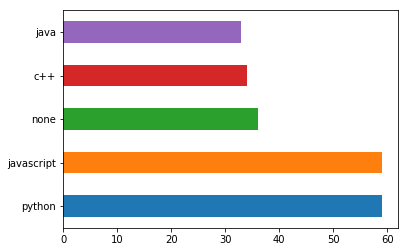

In [73]:
df.language.value_counts().plot.barh()

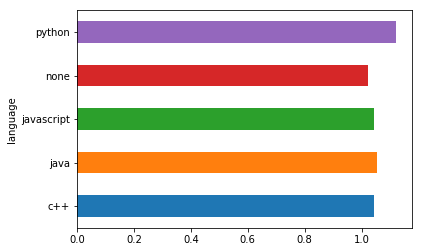

In [74]:
df.groupby('language')['article_per_kept'].mean().plot.barh()

### Explore the repos readme's that are PYTHON language...

In [75]:
py = df[df.language == 'python']
py.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
70,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234,0.686700,0.764087
71,python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,1.592391,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,275,0.938567,1.494565
72,python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,1.111413,justwatchapi justwatch com python 3 api instal...,409,justwatchapi justwatch com 3 api install pytho...,292,0.713936,0.793478
73,python,Swift Source Compatibility Suite\nSource compa...,197,1130,swift source compatibility suite source compat...,1218,1.077876,swift source compatibility suite source compat...,1218,source compatibility suite source compatibilit...,853,0.700328,0.754867
74,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,1.112693,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,1234,0.686700,0.764087


In [76]:
py_words = ' '.join(py.clean)

(-0.5, 399.5, 199.5, -0.5)

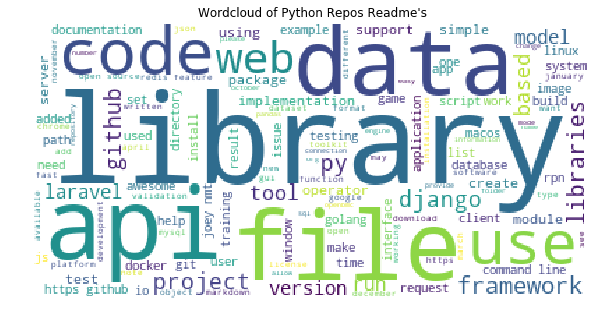

In [77]:
from wordcloud import WordCloud
img = WordCloud(background_color='white').generate(py_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.figure(figsize=(10,10))
plt.imshow(img)

plt.title('Wordcloud of Python Repos Readme\'s')
plt.axis('off')

### This shows us artifact, test and use are used a lot in Python Repo Readme files.

In [78]:
all_words = ' '.join(df.clean)
all_freq = pd.Series(all_words).value_counts()


### Compare the Python words with the All words collection in a Wordcloud

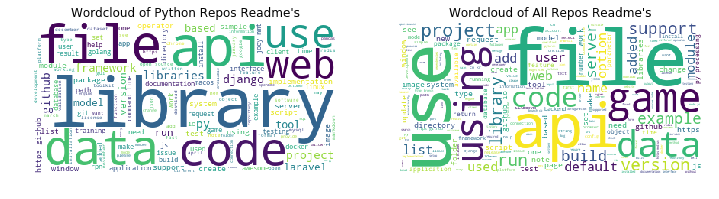

In [79]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
img = WordCloud(background_color='white').generate(py_words)
plt.imshow(img)
plt.title('Wordcloud of Python Repos Readme\'s')
plt.axis('off')

plt.subplot(1, 2, 2)
img = WordCloud(background_color='white').generate(all_words)
plt.imshow(img)
plt.title('Wordcloud of All Repos Readme\'s')
plt.axis('off')

# fig.tight_layout(pad=2)

plt.box(False)

In [80]:
mean_df = df.groupby('language').mean()
mean_df

,stars,original_cnt,article_cnt,article_per_kept,lemm_cnt,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
language,,,,,,,,
c++,1517.117647,1023.676471,1091.500000,1.042726,1091.500000,723.647059,0.705523,0.740027
java,776.878788,392.484848,414.424242,1.052872,414.424242,282.818182,0.728920,0.769214
javascript,207.152542,702.847458,747.711864,1.045074,747.711864,505.220339,0.694892,0.726412
none,405.694444,539.972222,606.250000,1.023266,606.250000,474.222222,0.791017,0.801868
python,3125.627119,816.440678,847.169492,1.120761,847.169492,600.389831,0.695447,0.788202


In [81]:

mean_df[['Words Gained During Basic Clean']] = mean_df[['original_cnt']]
mean_df[['Words Lost After Stop Words']] = mean_df[['original_cnt']]
mean_df[['Words Gained During Basic Clean']] = pd.DataFrame(mean_df.article_cnt - mean_df.original_cnt)
mean_df[['Words Lost After Stop Words']] = pd.DataFrame(mean_df['article_cnt'] - mean_df['word_cnt_after_stop'])
mean_df

,stars,original_cnt,article_cnt,article_per_kept,lemm_cnt,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,Words Gained During Basic Clean,Words Lost After Stop Words
language,,,,,,,,,,
c++,1517.117647,1023.676471,1091.500000,1.042726,1091.500000,723.647059,0.705523,0.740027,67.823529,367.852941
java,776.878788,392.484848,414.424242,1.052872,414.424242,282.818182,0.728920,0.769214,21.939394,131.606061
javascript,207.152542,702.847458,747.711864,1.045074,747.711864,505.220339,0.694892,0.726412,44.864407,242.491525
none,405.694444,539.972222,606.250000,1.023266,606.250000,474.222222,0.791017,0.801868,66.277778,132.027778
python,3125.627119,816.440678,847.169492,1.120761,847.169492,600.389831,0.695447,0.788202,30.728814,246.779661


In [82]:
mean_df = mean_df.reset_index()
mean_df

,language,stars,original_cnt,article_cnt,article_per_kept,lemm_cnt,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,Words Gained During Basic Clean,Words Lost After Stop Words
0,c++,1517.117647,1023.676471,1091.500000,1.042726,1091.500000,723.647059,0.705523,0.740027,67.823529,367.852941
1,java,776.878788,392.484848,414.424242,1.052872,414.424242,282.818182,0.728920,0.769214,21.939394,131.606061
2,javascript,207.152542,702.847458,747.711864,1.045074,747.711864,505.220339,0.694892,0.726412,44.864407,242.491525
3,none,405.694444,539.972222,606.250000,1.023266,606.250000,474.222222,0.791017,0.801868,66.277778,132.027778
4,python,3125.627119,816.440678,847.169492,1.120761,847.169492,600.389831,0.695447,0.788202,30.728814,246.779661


In [83]:
mean_df.rename(columns = {'word_cnt_after_stop': 'Final Word Count'}, inplace=True)


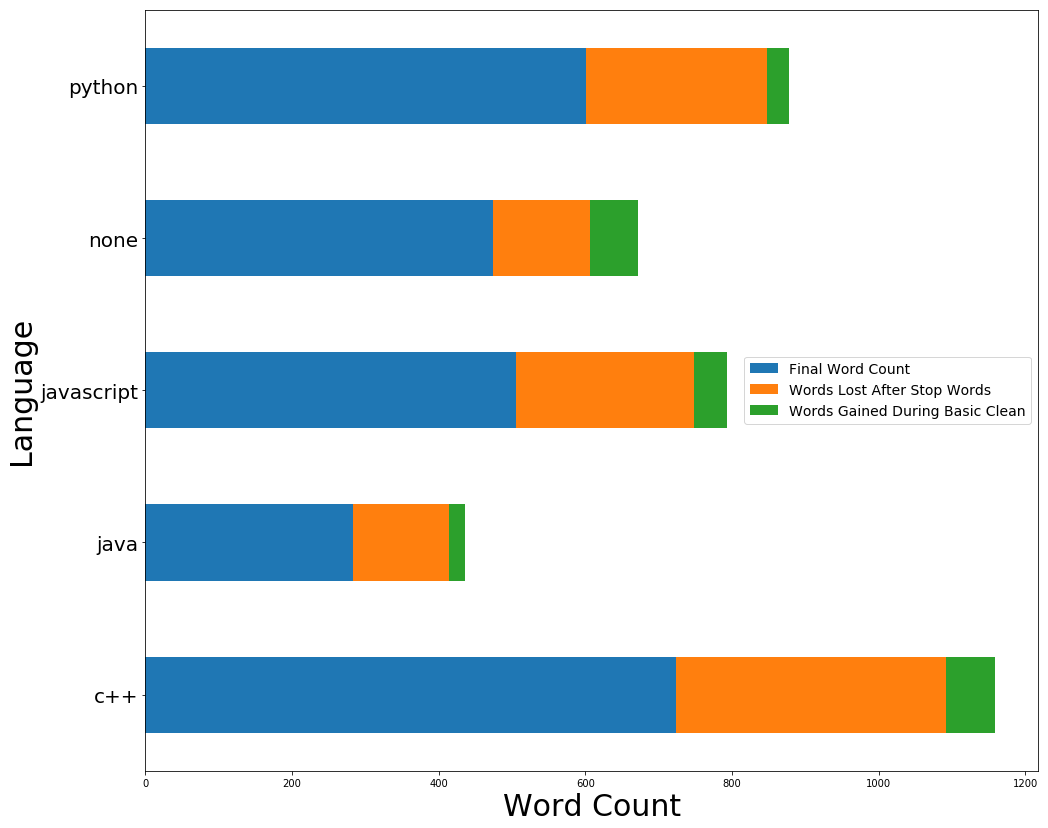

In [84]:
mean_df[['Final Word Count', 'Words Lost After Stop Words', 'Words Gained During Basic Clean']].plot.barh(stacked=True, figsize=(16, 14))
plt.ylabel('Language', fontsize=30, rotation=90)
plt.xlabel('Word Count', fontsize=30)
ticks, labels = plt.yticks()
labels = mean_df.language
plt.yticks(ticks, labels, fontsize=20)
plt.legend(fontsize=14, loc=7)
plt.show()

# Exploration

In [85]:
def df_info():
    cols = ['stars',
 'original_cnt',
 'article_cnt',
 'article_per_kept',
 'lemm_cnt',
 'word_cnt_after_stop',
 'per_stopwords_kept',
 'per_overall_kept']
    
    for col in cols:
        print(str(col) + ':')
        print(pd.DataFrame(df.groupby('language')[col].describe().T))

In [86]:
df_info()


stars:
language           c++          java   javascript         none        python
count        34.000000     33.000000    59.000000    36.000000     59.000000
mean       1517.117647    776.878788   207.152542   405.694444   3125.627119
std        4844.453935   2557.694711   912.974370  1304.855806  12500.545933
min           2.000000      2.000000     2.000000     2.000000      2.000000
25%           5.000000      2.000000     2.000000     5.750000      4.000000
50%          81.000000      3.000000     6.000000    18.000000     19.000000
75%         716.250000     20.000000    59.000000   131.750000    121.000000
max       27940.000000  11470.000000  5307.000000  6630.000000  67185.000000
original_cnt:
language           c++         java    javascript         none       python
count        34.000000    33.000000     59.000000    36.000000    59.000000
mean       1023.676471   392.484848    702.847458   539.972222   816.440678
std        2890.486168   502.217528   2034.525454  1176.60

In [87]:
def groupby_language_mean_plots():
    cols = ['stars',
 'original_cnt',
 'article_cnt',
 'article_per_kept',
 'lemm_cnt',
 'word_cnt_after_stop',
 'per_stopwords_kept',
 'per_overall_kept']
    
    for col in cols:
        print(str(col) + ':')
        plot = df.groupby('language')[col].mean().plot.barh()
        plt.show()

stars:


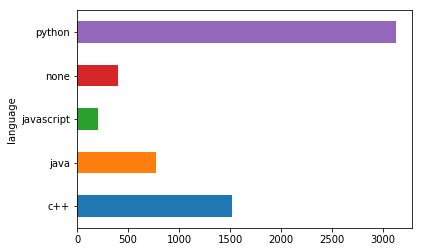

original_cnt:


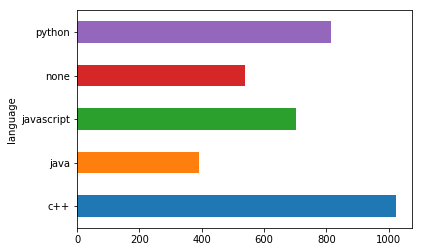

article_cnt:


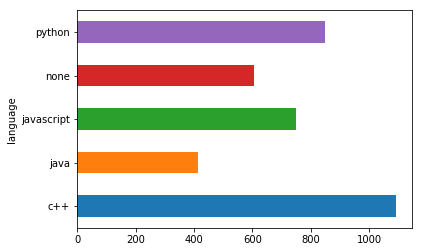

article_per_kept:


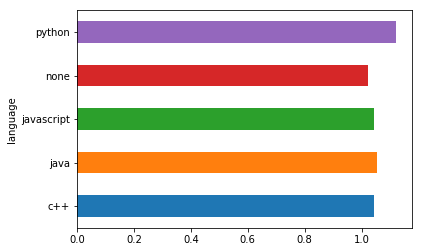

lemm_cnt:


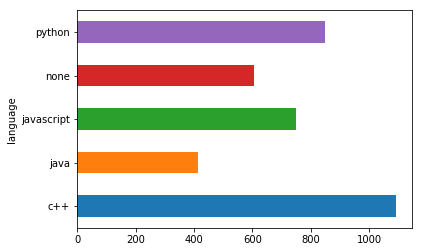

word_cnt_after_stop:


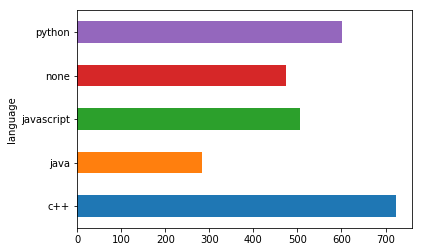

per_stopwords_kept:


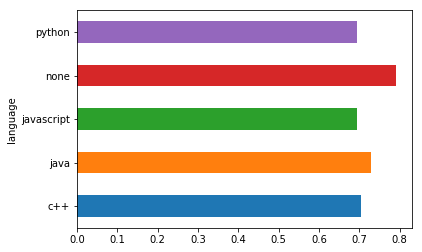

per_overall_kept:


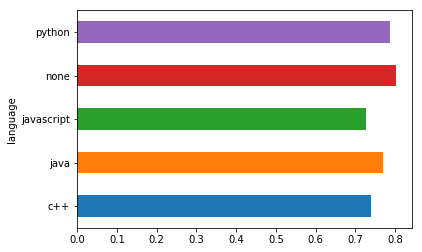

In [88]:
groupby_language_mean_plots()


# Models!

## Logistic Regression

In [89]:
df.language.value_counts(normalize=True)

python        0.266968
javascript    0.266968
none          0.162896
c++           0.153846
java          0.149321
Name: language, dtype: float64

In [90]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
1,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
2,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397
3,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37,1.000000,1.321429
4,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615,0.998377,0.998377


In [91]:
# df.clean.values

In [92]:
# df.language.values

In [93]:
docs = dict(zip(df.language.values, df.clean.values))

In [94]:
# docs

In [95]:
# docs.values()

In [96]:
df.shape

(221, 13)

In [97]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(docs.values())
tfidfs

<5x514 sparse matrix of type '<class 'numpy.float64'>'
	with 581 stored elements in Compressed Sparse Row format>

In [98]:
sm = pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())
sm

,0001,10,100,11,123456,127,1337,1584,20000,2019,...,website,well,went,wiki,windows,without,write,yes,young,zone
0,0.069793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069793,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.281544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.237294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.032326,0.000000,0.032326,0.000000,0.000000,0.129304,0.000000,0.000000,0.032326,...,0.032326,0.032326,0.032326,0.000000,0.052161,0.032326,0.032326,0.000000,0.032326,0.032326
4,0.000000,0.000000,0.052728,0.000000,0.052728,0.052728,0.000000,0.000000,0.052728,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.042540,0.000000,0.000000,0.052728,0.000000,0.000000


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = tfidf.fit_transform(df.clean)
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=random_state)
# not sure if we need to stratify y... so not doing it here... I think this is unneccessary because we dont have unbalanced set.
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [100]:
X_train

<176x16612 sparse matrix of type '<class 'numpy.float64'>'
	with 37186 stored elements in Compressed Sparse Row format>

In [101]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 98.86%
---
Confusion Matrix
actual      c++  java  javascript  none  python
predicted                                      
c++          27     0           0     0       0
java          0    26           0     0       0
javascript    0     0          46     1       0
none          0     0           0    28       0
python        0     0           1     0      47
---
              precision    recall  f1-score   support

         c++       1.00      1.00      1.00        27
        java       1.00      1.00      1.00        26
  javascript       0.98      0.98      0.98        47
        none       1.00      0.97      0.98        29
      python       0.98      1.00      0.99        47

   micro avg       0.99      0.99      0.99       176
   macro avg       0.99      0.99      0.99       176
weighted avg       0.99      0.99      0.99       176



In [102]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 57.78%
---
Confusion Matrix
actual      c++  java  javascript  none  python
predicted                                      
c++           3     0           0     0       0
java          0     2           0     0       0
javascript    2     3          10     1       3
none          0     0           0     2       0
python        2     2           2     4       9
---
              precision    recall  f1-score   support

         c++       1.00      0.43      0.60         7
        java       1.00      0.29      0.44         7
  javascript       0.53      0.83      0.65        12
        none       1.00      0.29      0.44         7
      python       0.47      0.75      0.58        12

   micro avg       0.58      0.58      0.58        45
   macro avg       0.80      0.52      0.54        45
weighted avg       0.73      0.58      0.56        45



## Get some new random data

In [103]:
# this function will give a list of urls from a RANDOM page on GitHub.
def get_random_urls_list():
    '''Generates a list of 10 urls from a random page on GitHubs Most Recently Updated repos'''
    pg = random.choice(range(101))
    urls = []
    headers = {'User-Agent': 'Student'}
    url = 'https://github.com/search?o=desc&p='+ str(pg) + '&q=stars%3A%3E1&s=updated&type=Repositories'
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    repo = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
    for div in repo:
        one = []
        one.append(re.findall(r'.*/.*',div.text)[0])
        urls.append(one)
#     print(len(urls))        
#         print(urls)
    final_urls = []
    for url in urls:
        url = 'https://github.com/'+url[0]
        final_urls.append(url)
    return final_urls

In [104]:
get_random_urls_list()

['https://github.com/enrico-dev/enrico',
 'https://github.com/Mellanox/sriovnet',
 'https://github.com/eogasawara/mylibrary',
 'https://github.com/pyllyukko/user.js',
 'https://github.com/NeurodataWithoutBorders/nwb_hackathons',
 'https://github.com/garek007/Marketing-Cloud',
 'https://github.com/Kistler-Group/sdbus-cpp',
 'https://github.com/dxxzst/Free-SS-SSR',
 'https://github.com/PerBothner/DomTerm',
 'https://github.com/nodejs/node-addon-api']

In [105]:
def clean(text):
    '''A simple function to cleanup text data'''
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [106]:
# Depends upon get_random_urls_list() function
def rand_url():
    '''Finds a random item from a list of urls. That list of urls is generated by another function, get_random_url_list()'''
    return random.choice(get_random_urls_list())

In [107]:
random_url = rand_url()
random_url

'https://github.com/gentoo-mirror/gentoo'

In [108]:
# This function depends on random_url() function, which finds a random url.
def new_rand_readme():
    '''Finds the readme file from the randomly generated url on GitHubs Most Recently Updated repos'''
    headers = {'User-Agent': 'Student'}
    response = get(random_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    read_me = soup.find(class_='markdown-body entry-content p-5')
    read_me.text
    test_text = ' '.join(clean(read_me.text))
    return test_text

In [109]:
new_rand_readme()

AttributeError: 'NoneType' object has no attribute 'text'

## Predict

In [110]:
def predict(unknown_text):
    return lm.predict(tfidf.transform([unknown_text]))[0]

In [111]:
print('Predicted the following language, ', predict(new_rand_readme()),',', 'for the following README.md file:', new_rand_readme())

AttributeError: 'NoneType' object has no attribute 'text'

In [113]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept
0,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
1,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485
2,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397
3,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37,1.000000,1.321429
4,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615,0.998377,0.998377


In [114]:
encoder = LabelEncoder()
encoder.fit(df.language)
df[['lang_encoded']] = df[['language']]
df.lang_encoded = encoder.transform(df.lang_encoded)
df.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,lang_encoded
0,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,3
1,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,3
2,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397,3
3,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37,1.000000,1.321429,3
4,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615,0.998377,0.998377,3


# Using t-SNE to make Visualization
### Use the TFIDFs from this logistic regression model.

In [115]:
vectors = TfidfVectorizer().fit_transform(df.clean)
vectors

<221x16612 sparse matrix of type '<class 'numpy.float64'>'
	with 46682 stored elements in Compressed Sparse Row format>

In [116]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

In [117]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 221 samples in 0.000s...
[t-SNE] Computed neighbors for 221 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 221 / 221
[t-SNE] Mean sigma: 0.253155
[t-SNE] Computed conditional probabilities in 0.017s
[t-SNE] Iteration 50: error = 60.2248306, gradient norm = 0.5358592 (50 iterations in 0.097s)
[t-SNE] Iteration 100: error = 63.1527939, gradient norm = 0.4686185 (50 iterations in 0.081s)
[t-SNE] Iteration 150: error = 62.7381096, gradient norm = 0.4597053 (50 iterations in 0.086s)
[t-SNE] Iteration 200: error = 60.5007935, gradient norm = 0.4989818 (50 iterations in 0.088s)
[t-SNE] Iteration 250: error = 60.3323593, gradient norm = 0.5226674 (50 iterations in 0.097s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.332359
[t-SNE] Iteration 300: error = 1.1066595, gradient norm = 0.0107913 (50 iterations in 0.080s)
[t-SNE] Iteration 350: error = 0.8733512, gradient norm = 0.0051077 

In [118]:
X_embedded[:, 0]

array([ -9.581133  ,  -9.578316  ,   6.658315  ,   6.7177844 ,
        -0.32227135,  14.279344  ,  -4.1785684 ,  14.278973  ,
       -10.41709   ,   9.827836  ,   7.834393  ,  -1.4368767 ,
         5.507166  ,   6.318685  ,  -7.106418  ,   2.8576548 ,
         2.9893806 , -13.84449   , -13.84446   ,  -0.22640589,
        -4.651997  ,  10.531071  ,   2.4782631 ,  -0.57908213,
        13.87567   ,   6.702309  ,  13.880369  ,  -4.0574503 ,
         3.582982  ,  -9.890738  ,  -1.1289164 ,   0.8498203 ,
        -4.5882554 ,   6.486478  ,   3.0354266 ,  -3.0146    ,
        10.599951  ,  -5.51765   ,  10.601068  ,   2.4259837 ,
         3.7203841 ,  10.187975  ,  -8.556256  ,   2.7250996 ,
        -1.1440259 , -17.235199  , -17.235199  ,  -4.796402  ,
        -4.7961    ,  14.304876  , -17.112535  ,  -0.30014208,
         3.245175  , -14.302682  ,   3.8588107 , -14.303847  ,
         1.3530841 ,  -1.348853  ,  -1.5473732 ,   0.18015723,
        14.071575  ,   1.5316767 ,  -5.386961  ,   6.57

In [119]:
df[['language','lang_encoded']]

,language,lang_encoded
0,none,3
1,none,3
2,none,3
3,none,3
4,none,3
5,none,3
6,none,3
7,none,3
8,none,3
9,none,3


In [120]:
list(df['language'].unique())

['none', 'c++', 'python', 'javascript', 'java']

In [121]:
list(df['lang_encoded'].unique())

[3, 0, 4, 2, 1]

In [122]:
legend = pd.DataFrame({'language': list(df['language'].unique()), 'lang_encoded':list(df['lang_encoded'].unique())})
legend = legend.sort_values(by='lang_encoded')
legend

,language,lang_encoded
1,c++,0
4,java,1
3,javascript,2
0,none,3
2,python,4


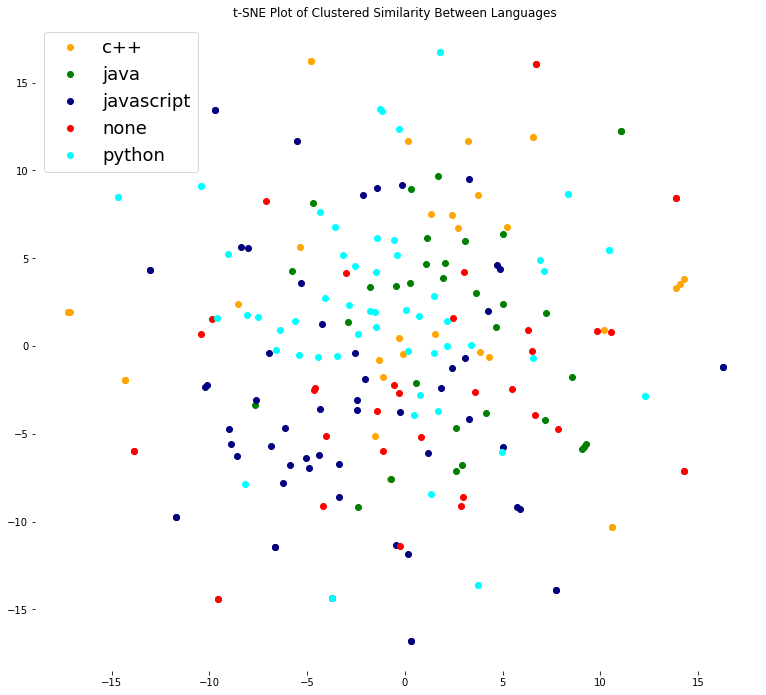

In [123]:
# make a mapping from category to your favourite colors and labels
category_to_color = {0: 'orange', 1: 'green', 2:'navy', 3: 'red', 4: 'cyan'}
category_to_label = {0: 'c++', 1:'java', 2:'javascript', 3:'none', 4: 'python'}

# plot each category with a distinct label
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
# setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
# plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=df.lang_encoded.values, marker="x", cmap='Greens')

for category, color in category_to_color.items():
    mask = df.lang_encoded == category
    ax.plot(X_embedded[mask, 0], X_embedded[mask, 1], 'o', 
            color=color, label=category_to_label[category])
plt.title('t-SNE Plot of Clustered Similarity Between Languages')
ax.legend(fontsize=18, loc='best')

# Perform a train/test split in order to work with some other models...

# Split Train/Test

In [124]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,lang_encoded
0,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,3
1,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,3
2,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397,3
3,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37,1.000000,1.321429,3
4,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615,0.998377,0.998377,3


In [125]:
df_split_2 = df[['clean','language']]

In [126]:
X = df_split_2.clean
y = df_split_2.language
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

## Naive Bayes Model

In [127]:
# Define what the languages are... Since we are only using the top occuring languages, this list will be smaller than the first language list.

my_tags = list(df_split_2.language.unique())
my_tags

['none', 'c++', 'python', 'javascript', 'java']

In [128]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs
accuracy 0.47761194029850745
              precision    recall  f1-score   support

        none       1.00      0.22      0.36         9
         c++       1.00      0.17      0.29        12
      python       0.35      1.00      0.52        17
  javascript       1.00      0.40      0.57        10
        java       0.70      0.37      0.48        19

   micro avg       0.48      0.48      0.48        67
   macro avg       0.81      0.43      0.44        67
weighted avg       0.75      0.48      0.45        67



### Naive Bayes performs poorly at 47.7% accuracy. We want to optimize for accuracy so let's build more models.

# Linear Support Vector Machine

In [129]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs
accuracy 0.6567164179104478
              precision    recall  f1-score   support

        none       0.70      0.78      0.74         9
         c++       0.55      0.50      0.52        12
      python       0.68      0.88      0.77        17
  javascript       0.57      0.40      0.47        10
        java       0.71      0.63      0.67        19

   micro avg       0.66      0.66      0.66        67
   macro avg       0.64      0.64      0.63        67
weighted avg       0.65      0.66      0.65        67



## Linear SVM performs much better at 65% accuracy.

# Logistic Regression Model 2

In [130]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
accuracy 0.6567164179104478
              precision    recall  f1-score   support

        none       0.70      0.78      0.74         9
         c++       0.70      0.58      0.64        12
      python       0.62      0.88      0.73        17
  javascript       0.67      0.40      0.50        10
        java       0.65      0.58      0.61        19

   micro avg       0.66      0.66      0.66        67
   macro avg       0.67      0.64      0.64        67
weighted avg       0.66      0.66      0.65        67



## This Logistic Regression model performs at 65.67%, slightly worse than the first one.

In [131]:
import gensim

# Word2vec and Logistic Regression


In [132]:
print(gensim.__version__)

3.7.3


### Use gensim to load a word2vec model pretrained on google news and perform some simple actions with the word vectors.

In [133]:
from gensim.models import Word2Vec
path = '~/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/'
file = "GoogleNews-vectors-negative300.bin.gz"
wv = gensim.models.KeyedVectors.load_word2vec_format(path+file, binary=True)
wv.init_sims(replace=True)

###  Normalize the word2vec vectors first, so they all have equal length. 

### Load up a Google News model. 

In [134]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

### Define some functions to perform Bag of Words analysis on the word vectors. Simple stuff like word averaging, summation, and weighted addition.

In [135]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [136]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

### Tokenize the text, Train/Test split...

In [137]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,lang_encoded
0,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,3
1,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,3
2,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397,3
3,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37,1.000000,1.321429,3
4,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615,0.998377,0.998377,3


In [138]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['clean']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['clean']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [139]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['language'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.language))
print(classification_report(test.language, y_pred,target_names=my_tags))

accuracy 0.5074626865671642
              precision    recall  f1-score   support

        none       0.40      0.67      0.50         9
         c++       0.40      0.33      0.36        12
      python       0.57      0.76      0.65        17
  javascript       0.56      0.50      0.53        10
        java       0.60      0.32      0.41        19

   micro avg       0.51      0.51      0.51        67
   macro avg       0.50      0.52      0.49        67
weighted avg       0.52      0.51      0.49        67



## The Word2vec and Logistic Regression model performs at 50% accuracy.

# BOW with Keras


In [150]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras.models import Sequential

import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot

In [151]:
print(keras.__version__)

2.2.4


In [152]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,article_per_kept,lemmatized,lemm_cnt,clean,word_cnt_after_stop,per_stopwords_kept,per_overall_kept,lang_encoded
0,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,3
1,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,1.112426,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,139,0.739362,0.822485,3
2,none,About the easyEPG project\nThis is the free pl...,20,63,about the easyepg project this is the free pla...,66,1.047619,about the easyepg project this is the free pla...,66,easyepg project free platform download epg dat...,52,0.787879,0.825397,3
3,none,andrewrothstein.vagrant\n\nInstalls vagrant\nR...,2,28,andrewrothstein vagrant installs vagrant requi...,37,1.321429,andrewrothstein vagrant installs vagrant requi...,37,andrewrothstein vagrant installs vagrant requi...,37,1.000000,1.321429,3
4,none,Free ShadowsocksR免费 ShadowsocksR 服务\nLatest up...,27,616,free shadowsocksr shadowsocksr latest update a...,616,1.000000,free shadowsocksr shadowsocksr latest update a...,616,free shadowsocksr shadowsocksr latest update s...,615,0.998377,0.998377,3


In [153]:
df.shape

(221, 14)

### Split Train/Test... 

### Tokenize and then turn texts to matrix.

In [189]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=random_state)
train = pd.DataFrame(dict(label=y_train, clean=X_train))
test = pd.DataFrame(dict(label=y_test, clean=X_test))
train

,label,clean
196,java,live wallpaper celebrating ice cream nyanwiche...
163,javascript,roosevelt mvc web framework roosevelt web appl...
125,python,rpn rpn command line reverse polish notation c...
45,c++,mesen mesen cross platform snes emulator windo...
138,javascript,ethereum ready framework agnostic redux store ...
185,javascript,struggle gera original digital card game curre...
60,c++,mhw costume armor mhw costume armor monster hu...
152,javascript,priest dubbo mybatis springboot base soa rest ...
104,python,introduction gislite english static site gener...
26,none,great pug bar metaverse vrchat thegreatpug com...


In [190]:
# train_size = int(len(df) * .7)
# train_text = df['clean'][:train_size]
# train_label = df['language'][:train_size]

# test_text = df['clean'][train_size:]
# test_label = df['language'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_text) # only fit on train

x_train = tokenize.texts_to_matrix(train.clean)
x_test = tokenize.texts_to_matrix(test.clean)


In [191]:
# # print(train_size)
# # print(train_text)
# # print(train_label)
# # print(test_text)
# print(test_label)

# # print(type(tokenize))

# # print(x_train)
# # print(len(x_train))
# # print(x_test)
# # print(len(x_test))

In [192]:
encoder = LabelEncoder()
encoder.fit(train.label)
y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)

In [193]:
print(y_train)
print(len(y_train))
# print(y_test)
# print(len(y_test))

[1 2 4 0 2 2 0 2 4 3 4 3 3 2 3 0 4 4 4 0 4 4 0 4 2 1 2 1 2 2 1 4 1 3 4 2 4
 1 2 3 2 0 4 1 1 0 4 4 4 4 1 2 2 2 2 0 4 4 3 4 2 1 4 4 3 3 0 2 2 1 0 4 4 3
 2 4 2 0 3 4 0 1 4 3 2 4 3 0 2 2 0 4 0 2 3 1 2 1 3 2 3 0 1 1 0 0 3 2 4 4 0
 1 3 3 2 1 2 4 2 0 4 4 4 3 2 3 3 2 2 3 1 2 3 2 4 4 0 2 4 2 3 1 4 0 1 4 2 2
 2 1 1 0 4 0]
154


In [194]:
y_test

array([3, 4, 4, 0, 0, 1, 2, 4, 1, 1, 2, 2, 1, 2, 2, 4, 1, 3, 2, 3, 4, 2,
       0, 3, 1, 4, 4, 2, 3, 1, 4, 2, 0, 4, 3, 4, 2, 3, 0, 1, 4, 3, 3, 2,
       4, 3, 0, 4, 2, 4, 2, 4, 0, 1, 4, 0, 4, 2, 2, 2, 4, 2, 3, 1, 2, 0,
       0])

In [195]:
np.max(y_train)

4

In [196]:
y_train.shape

(154,)

In [197]:
num_classes = int(np.max(y_train)) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)


In [198]:
y_train.shape

(154, 5)

In [199]:


batch_size = 32
epochs = 4

# Build the model
model = Sequential()
# print(type(model))
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 138 samples, validate on 16 samples
Epoch 1/4
138/138 [==============================] - 0s 4ms/step - loss: 1.6542 - acc: 0.2101 - val_loss: 1.6242 - val_acc: 0.3750
Epoch 2/4
138/138 [==============================] - 0s 381us/step - loss: 1.1836 - acc: 0.5290 - val_loss: 1.6181 - val_acc: 0.5000
Epoch 3/4
138/138 [==============================] - 0s 435us/step - loss: 0.9356 - acc: 0.7536 - val_loss: 1.5143 - val_acc: 0.6250
Epoch 4/4
138/138 [==============================] - 0s 389us/step - loss: 0.7504 - acc: 0.8623 - val_loss: 1.3274 - val_acc: 0.6250


## Achieved accuracy of 86.23% in 4 epochs

In [200]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

67/67 [==============================] - 0s 148us/step
Test score: 1.2465737666656722
Test accuracy: 0.6119402985074627


## Achieved accuracy of 61.19% on the Test dataset.

## Poor performance is probably due to small sample size (220 repos).